In [35]:
# Project 02 (Template)

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale, StandardScaler

In [2]:
# read data
data_train = pd.read_csv('merged_train.csv')
data_test = pd.read_csv('demographics_test.csv')

In [3]:
x = data_train[data_train.columns[0:41]]
y = data_train['Democratic']



# Task1

In [4]:
folds = KFold(n_splits = 10, shuffle = False)
for train_index, test_index in folds.split(data_train):
    print([train_index.shape[0], test_index.shape[0]])

[1903, 212]
[1903, 212]
[1903, 212]
[1903, 212]
[1903, 212]
[1904, 211]
[1904, 211]
[1904, 211]
[1904, 211]
[1904, 211]


## Applied 10 fold cross validation

In [5]:
#Standardizing:
category = x.select_dtypes(include=['object'])
x= x.drop(['County','State'], axis=1)
x.columns
x1=x
cols = x.columns

# Task 2

In [6]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x) 


In [7]:
x

array([[-0.21198644, -0.20971993, -0.43727155, ..., -0.64563528,
        -0.16165084, -0.40756727],
       [-0.23268946, -0.2335666 ,  0.18258725, ..., -0.53773518,
        -0.20230552, -0.29710535],
       [-0.05543203, -0.05873583,  1.086548  , ..., -0.12134922,
         0.03242815, -0.46511795],
       ...,
       [ 2.37252743,  2.42891121,  0.49251665, ...,  1.04456646,
         3.45572909, -0.50272632],
       [-0.2635784 , -0.26681094,  0.95741075, ..., -0.42861093,
        -0.19366502, -0.50848212],
       [ 2.98073415,  2.75070234,  3.10108909, ...,  0.70495221,
         0.89337676,  0.01659985]])

In [8]:
corr_dict = {}
for c in cols:
    corr_dict[c] = abs(x1[c].corr(data_train['Democratic']))
print (corr_dict)

{'2014 Population': 0.9170280360359472, '2010 Population': 0.9222997841159737, 'Population Percent Change': 0.19647463921731934, 'Percent Under 5 Years': 0.06700319094545581, 'Percent Under 18 Years': 0.01750524976291883, 'Percent 65 and Older': 0.18705202468342683, 'Percent Female': 0.11625911059808158, 'Percent White': 0.1760189858992344, 'Percent Black or African American': 0.10394094900362748, 'Percent American Indian and Alaska Native': 0.02919767948191654, 'Percent Asian': 0.4460593727958007, 'Percent Native Hawaiian and Other Pacific Islander': 0.044413574462591504, 'Percent Two or More Races': 0.11233367925744914, 'Percent Hispanic or Latino': 0.14807492551719198, 'Percent White, not Hispanic or Latino': 0.23184469526213475, 'Veterans': 0.8180566444583521, 'Percent Foreign Born': 0.42832455426864974, 'Percent High School or Higher': 0.07229753450036613, "Percent Bachelor's Degree or Higher": 0.30497530639008824, 'Housing Units': 0.9124961561310577, 'Percent Housing Units in Mul

In [9]:
import operator
sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
sortedcorr_dict

[('Percent Under 18 Years', 0.01750524976291883),
 ('Percent American Indian and Alaska Native', 0.02919767948191654),
 ('Percent Native Hawaiian and Other Pacific Islander', 0.044413574462591504),
 ('Percent Below Poverty Level', 0.056773261343787955),
 ('Percent Under 5 Years', 0.06700319094545581),
 ('Land Area', 0.07131100826523407),
 ('Percent High School or Higher', 0.07229753450036613),
 ('Percent Living in Same House +1 Years', 0.0866579138131413),
 ('Percent Black or African American', 0.10394094900362748),
 ('Percent Two or More Races', 0.11233367925744914),
 ('Persons per Household', 0.11453276901257069),
 ('Percent Female', 0.11625911059808158),
 ('Mean Travel Time to Work', 0.11829651953696521),
 ('Retail Sales per Capita', 0.12651802826025377),
 ('Percent Hispanic or Latino', 0.14807492551719198),
 ('Percent White', 0.1760189858992344),
 ('Percent 65 and Older', 0.18705202468342683),
 ('Population Percent Change', 0.19647463921731934),
 ('Median Household Income', 0.21941

Note: 2010 Popoulation is the best feature

# Task 3

In [10]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['2010 Population']], y = data_train['Democratic'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.73451773 0.63442533 0.76060198 0.8311719  0.71394433 0.84587153
 0.93193357 0.7449996  0.69965977 0.84739669]
[0.7744522426399849, 0.08363958664458077]


In [11]:
# train and test simple linear regression model (Democratic votes)
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2010 Population']], y = data_train['Democratic'])
print(r_squared)

0.8506368917803713


In [12]:
# Testing with multiple features:
#With Households:

model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['Households']], y = data_train['Democratic'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.73705239 0.59143458 0.72597982 0.88291232 0.73294003 0.84321171
 0.902528   0.78665565 0.732226   0.87600204]
[0.7810942544728345, 0.09146861823049059]


In [13]:
# train and test simple linear regression model (Democratic votes)
model = linear_model.LinearRegression().fit(X = data_train[['Households']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['Households']], y = data_train['Democratic'])
print(r_squared)

0.8479561953786217


In [14]:
# Testing with 2014 Population:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['2014 Population']], y = data_train['Democratic'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.70469798 0.6199373  0.73642071 0.82636984 0.70207372 0.84598275
 0.92150053 0.72944503 0.69255693 0.8293083 ]
[0.7608293083046329, 0.08645614943642453]


In [15]:
# train and test simple linear regression model (Democratic votes)
model = linear_model.LinearRegression().fit(X = data_train[['2014 Population']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2014 Population']], y = data_train['Democratic'])
print(r_squared)

0.8409404188759462


The best feature is 2010 population as the r_squared value for it is the highest among others.

In [119]:
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population']].values, y = data_train['Democratic'].values)

y_pred = model.predict(data_test[['2010 Population']].values)

In [17]:
y_pred

array([ 6.22195493e+02,  2.75073689e+02,  1.18351660e+04,  8.41702996e+02,
        1.32362874e+04, -2.04116191e+02,  4.23411679e+02,  2.03776893e+03,
       -3.95991796e+01,  5.31574797e+02, -2.67741554e+02,  3.58414700e+04,
        5.44999717e+03,  7.10680163e+03,  1.37052066e+03,  2.69356464e+03,
        1.26535702e+03,  2.01131896e+03,  3.58677385e+03,  6.58552843e+02,
        4.37811882e+04,  2.94397590e+03,  6.29403306e+03,  3.50842376e+03,
       -1.32764890e+02,  8.17316272e+03,  8.71043347e+03,  4.79701916e+03,
        6.53553708e+02,  3.02050812e+03, -2.79648586e+02, -3.17096657e+02,
        1.32298342e+03,  1.78863019e+03,  1.32461982e+02,  9.90586347e+02,
        2.90943641e+03,  1.25315728e+05,  8.17334451e+03,  1.65783462e+03,
        4.73630238e+03,  1.45456064e+04,  1.70273626e+02,  1.10647540e+03,
        5.08215199e+02,  1.86176297e+04,  3.82327842e+03,  4.22494530e+04,
        1.97450714e+03,  3.13871492e+04,  2.71692424e+03,  5.80084560e+03,
        1.07748041e+03, -

## For simple linear regression to predict number of votes of Democratic, the best performance is given by the predictor variable 2010 population

# Task 4

In [118]:
# ('Veterans', 0.8180566444583521),
#  ('Retail Sales', 0.8874040768870053),
#  ('Housing Units', 0.9124961561310577),
#  ('2014 Population', 0.9170280360359472),
#  ('Households', 0.9208453699610053),
#  ('2010 Population', 0.9222997841159737)]
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales', 'Veterans']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales', 'Veterans']], y = data_train['Democratic'])
print(r_squared)
best_dems = model

0.904157216388376


In [19]:
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']], y = data_train['Democratic'])
print(r_squared)

0.8947842232390532


In [20]:
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units']], y = data_train['Democratic'])
print(r_squared)

0.8887283256069811


In [21]:
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population', 'Households', '2014 Population']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2010 Population', 'Households', '2014 Population']], y = data_train['Democratic'])
print(r_squared)

0.8866444724307134


## The r-squared value is best for the following 6 features: ['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales', 'Veterans']

In [22]:
# train and test multiple linear regression model (Democratic votes)
#import statsmodel.api as sm
model = linear_model.LinearRegression().fit(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']], y = data_train['Democratic'])
r_squared = model.score(X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']], y = data_train['Democratic'])

# X1 = sm.add_constant(data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']])
# result = sm.OLS(data_train['Democratic'],X1).fit()
X = data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']]
y = data_train['Democratic']
adjusted_r_squared = 1 - (1-model.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8945347785335981


# Task 5(Republican)

In [23]:
x = data_train[data_train.columns[0:41]]
y = data_train['Republican']

In [24]:
folds = KFold(n_splits = 10, shuffle = False)
for train_index, test_index in folds.split(data_train):
    print([train_index.shape[0], test_index.shape[0]])

[1903, 212]
[1903, 212]
[1903, 212]
[1903, 212]
[1903, 212]
[1904, 211]
[1904, 211]
[1904, 211]
[1904, 211]
[1904, 211]


In [25]:
#Standardizing:
category = x.select_dtypes(include=['object'])
x= x.drop(['County','State'], axis=1)
x.columns
x1=x
cols = x.columns

In [26]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x) 


In [27]:
corr_dict = {}
for c in cols:
    corr_dict[c] = abs(x1[c].corr(data_train['Republican']))
print (corr_dict)

import operator
sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
sortedcorr_dict

{'2014 Population': 0.7883389562803518, '2010 Population': 0.7842242015927963, 'Population Percent Change': 0.339273122401888, 'Percent Under 5 Years': 0.0833469244875473, 'Percent Under 18 Years': 0.0751307723478758, 'Percent 65 and Older': 0.22446607599344548, 'Percent Female': 0.15900003839913254, 'Percent White': 0.11485798835959436, 'Percent Black or African American': 0.06904125552668654, 'Percent American Indian and Alaska Native': 0.06379367639997208, 'Percent Asian': 0.36606007791552664, 'Percent Native Hawaiian and Other Pacific Islander': 0.02706828457665061, 'Percent Two or More Races': 0.0976493696390258, 'Percent Hispanic or Latino': 0.11800668658628141, 'Percent White, not Hispanic or Latino': 0.165735313804323, 'Veterans': 0.8469602412653618, 'Percent Foreign Born': 0.3834640346031978, 'Percent High School or Higher': 0.16085088586424037, "Percent Bachelor's Degree or Higher": 0.37119846377347704, 'Housing Units': 0.8178424759510621, 'Percent Housing Units in Multi-Unit

[('Percent Native Hawaiian and Other Pacific Islander', 0.02706828457665061),
 ('Land Area', 0.05949594604387295),
 ('Percent American Indian and Alaska Native', 0.06379367639997208),
 ('Percent Black or African American', 0.06904125552668654),
 ('Percent Under 18 Years', 0.0751307723478758),
 ('Percent Under 5 Years', 0.0833469244875473),
 ('Percent Two or More Races', 0.0976493696390258),
 ('Percent White', 0.11485798835959436),
 ('Percent Hispanic or Latino', 0.11800668658628141),
 ('Mean Travel Time to Work', 0.12029338183874144),
 ('Percent Living in Same House +1 Years', 0.12770668694972462),
 ('Persons per Household', 0.14278906958849039),
 ('Percent Below Poverty Level', 0.1491039735599358),
 ('Percent Female', 0.15900003839913254),
 ('Percent High School or Higher', 0.16085088586424037),
 ('Percent White, not Hispanic or Latino', 0.165735313804323),
 ('Homeownership Rate', 0.20402524558581087),
 ('Retail Sales per Capita', 0.21187696448202772),
 ('Percent Language Other than E

In [28]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['Veterans']], y = data_train['Republican'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[0.72040149 0.779711   0.83176961 0.76344887 0.67151507 0.60243547
 0.52374002 0.75151168 0.53140282 0.79218728]
[0.696812330206732, 0.10441848897307272]


In [29]:
# train and test simple linear regression model (Republican votes)
model = linear_model.LinearRegression().fit(X = data_train[['Veterans']], y = data_train['Republican'])
r_squared = model.score(X = data_train[['Veterans']], y = data_train['Republican'])
print(r_squared)

0.7173416502842804


In [30]:

model = linear_model.LinearRegression()
scores = cross_val_score(model, X = data_train[['Housing Units']], y = data_train['Housing Units'], cv = folds)
print(scores)
print([scores.mean(), scores.std()])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.0, 0.0]


In [31]:
# train and test simple linear regression model (Democratic votes)
model = linear_model.LinearRegression().fit(X = data_train[['Housing Units']], y = data_train['Republican'])
r_squared = model.score(X = data_train[['Housing Units']], y = data_train['Republican'])
print(r_squared)

0.6688663154697629


In [121]:
model = linear_model.LinearRegression().fit(X = data_train[['Veterans']].values, y = data_train['Republican'].values)

y_pred = model.predict(data_test[['Veterans']].values)

In [33]:
y_pred

array([  3403.91560027,   3089.97709364,  14762.78156732,   4016.50340054,
        14069.67057866,   2760.74937403,   3339.70090573,   4589.33924705,
         3075.70716152,   3816.72435087,   2571.16313302,  33716.30926449,
         8902.93587057,  13380.63671347,   3909.47890964,   5388.45544573,
         4699.42158054,   4678.01668236,   5959.25273051,   3433.47474537,
        31238.43748004,   6732.88690756,   7952.96610376,   6122.33766902,
         2851.46537108,   9932.4095449 ,   9614.39391481,   7327.12765224,
         3545.5956406 ,   4595.45493224,   2739.34447585,   2748.51800364,
         4341.65399669,   4687.19021015,   3060.41794854,   4370.19386093,
         4995.01303158,  37595.69223924,  10487.91761669,   4123.52789143,
         6666.63365129,  13874.98793332,   3246.94634696,   4647.43825639,
         4301.90204293,  19627.80913917,   6656.44084263,  49486.62281817,
         4253.99584224,  34039.42129891,   5803.30275806,   6538.20426221,
         4627.05263908,  

## For simple linear Regression to predict number of votes for Republican in each county: the best predictor variable that gives the best performance is Veterans.

# Task 6

In [122]:
model = linear_model.LinearRegression().fit(X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population']], y = data_train['Republican'])
r_squared = model.score(X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population']], y = data_train['Republican'])
print(r_squared)
best_repb = model

0.749031079136401


In [35]:
model = linear_model.LinearRegression().fit(X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households']], y = data_train['Republican'])
r_squared = model.score(X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households']], y = data_train['Republican'])
print(r_squared)

0.739210129967564


In [36]:
model = linear_model.LinearRegression().fit(X = data_train[['Veterans', 'Housing Units', 'Retail Sales']], y = data_train['Republican'])
r_squared = model.score(X = data_train[['Veterans', 'Housing Units', 'Retail Sales']], y = data_train['Republican'])
print(r_squared)

0.7207794308346294


In [37]:
# train and test multiple linear regression model (Republican votes)
#import statsmodel.api as sm
model = linear_model.LinearRegression().fit(X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population']], y = data_train['Republican'])
r_squared = model.score(X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population']], y = data_train['Republican'])

# X1 = sm.add_constant(data_train[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales']])
# result = sm.OLS(data_train['Democratic'],X1).fit()
X = data_train[['Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population']]
y = data_train['Republican']
adjusted_r_squared = 1 - (1-model.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7484360840656006


## For multiple linear Regression, the best performance is given by the following parameters: 'Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population'

# Task 7

In [38]:
# read data
data_train = pd.read_csv('merged_train.csv')
data_test = pd.read_csv('demographics_test.csv')

In [39]:
x = data_train[data_train.columns[0:41]]
y = data_train['Party']

In [40]:
#Standardizing:
category = x.select_dtypes(include=['object'])
x= x.drop(['County','State'], axis=1)

In [41]:
cols = x.columns

corr_dict = {}
for c in cols:
    corr_dict[c] = abs(x[c].corr(y))

import operator
sortedcorr_dict = sorted(corr_dict.items(), key= operator.itemgetter(1))
sortedcorr_dict

[('Percent Female', 0.00344106468543176),
 ('Mean Travel Time to Work', 0.004159722786421002),
 ('Population Percent Change', 0.004303971031175182),
 ('Median Household Income', 0.014073430812183551),
 ('Percent Under 18 Years', 0.048832748270576626),
 ('Per Capita Income', 0.057656264481787595),
 ('Percent Under 5 Years', 0.06478856817840044),
 ('Persons per Household', 0.06524175480418887),
 ('Building Permits', 0.06875734221726619),
 ('Percent High School or Higher', 0.07604191988197857),
 ('Percent Native Hawaiian and Other Pacific Islander', 0.076545950539493),
 ('Manufacturers Shipments', 0.07803366595400792),
 ('Land Area', 0.08237503917178769),
 ('Retail Sales per Capita', 0.08691530562005276),
 ('Merchant Wholesaler Sales', 0.08867031186035655),
 ('Percent Living in Same House +1 Years', 0.10170214843269912),
 ('Accommodation and Food Services Sales', 0.12423807768688179),
 ('Percent American Indian and Alaska Native', 0.1259357160784947),
 ('Veterans', 0.12866565630337093),
 

In [47]:
# partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent White, not Hispanic or Latino', 'Percent White', 'Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate']],
                                                    data_train['Party'], test_size=0.25, random_state = 1)

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [50]:

y_pred = classifier.predict(x_test)

In [51]:
Svm = SVC(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters= [{'C':[1,10,100], 'kernel': ['rbf', 'linear']}]
gridsearch = GridSearchCV(estimator=Svm, param_grid = parameters, scoring='accuracy', cv=10)
gridSearch = gridsearch.fit(x_train, y_train)


In [52]:
print(gridSearch.best_score_,gridSearch.best_params_)

0.7831021437578815 {'C': 100, 'kernel': 'rbf'}


In [53]:
finalSVM= SVC(kernel='rbf', C=100, random_state = 0)
finalSVM.fit(x_train, y_train)
y_pred = finalSVM.predict(x_test)

In [54]:
bestModel = finalSVM
y_pred = finalSVM.predict(x_test)

In [55]:
from sklearn import metrics
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[378  24]
 [ 83  44]]


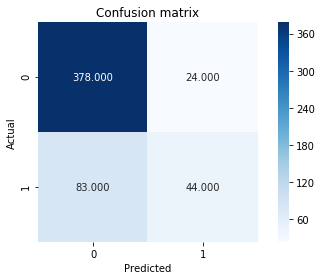

In [56]:
# plot confusion matrix
sns.heatmap(confusionmatrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [57]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7977315689981096
0.2022684310018904
[0.81995662 0.64705882]
[0.94029851 0.34645669]
[0.8760139  0.45128205]


## Kernel SVM gives an accuracy of 79.77% for Kernel as RBF and C=100

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 3)  
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
y_pred = classifierKNN.predict(x_test) 

In [60]:
from sklearn import metrics
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[348  54]
 [ 75  52]]


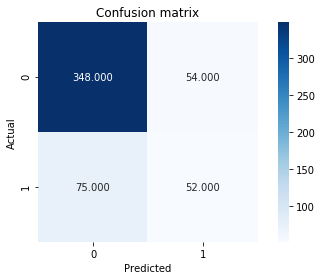

In [61]:
# plot confusion matrix
sns.heatmap(confusionmatrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [62]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.7561436672967864
0.2438563327032136
[0.82269504 0.49056604]
[0.86567164 0.40944882]
[0.84363636 0.44635193]


## KNN with 3 neighbors gives an accuracy of 75.61%

# Task 8

In [63]:
x = data_train[data_train.columns[2:41]]
x = x[['Percent White, not Hispanic or Latino','Percent White','Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate']]
y = data_train['Party']

In [64]:
factor = pd.factorize(data_train['Party'])
print(factor[0])
data_train.Party = factor[0]

[0 0 0 ... 0 0 1]


In [65]:
from sklearn.cluster import KMeans, DBSCAN
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 2).fit(x)

In [66]:
clustering.cluster_centers_

array([[50.89265625, 67.49109375, 14.7534375 , 67.245625  ],
       [87.60847458, 92.50277966, 11.28745763, 74.0660339 ]])

In [67]:
clusters = clustering.labels_
print(clusters)


[1 1 1 ... 1 1 0]


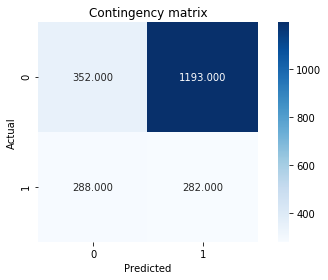

In [68]:
x['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(y, x['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [69]:
# compute adjusted Rand index
print(metrics.adjusted_rand_score(y,x['clusters']))

0.13133169192638589


In [70]:
# compute normalized mutual information
print(metrics.normalized_mutual_info_score(y,x['clusters']))

0.057293153599497715


In [71]:
# compute silhouette coefficient
print(metrics.silhouette_score(x,x['clusters'], metric = "euclidean"))

0.5271864862954005


In [72]:
x = data_train[data_train.columns[2:41]]
x = x[['Percent White, not Hispanic or Latino','Percent White','Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate','Median Value of Owner-Occupied Units']]
y = data_train['Party']

In [73]:
factor = pd.factorize(data_train['Party'])
print(factor[0])
data_train.Party = factor[0]

[0 0 0 ... 0 0 1]


In [74]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 2).fit(x)

In [75]:
clustering.cluster_centers_

array([[7.33032258e+01, 8.40193548e+01, 2.13556452e+01, 6.92495968e+01,
        2.98862500e+05],
       [7.69226567e+01, 8.50557579e+01, 1.11381896e+01, 7.23678093e+01,
        1.09685324e+05]])

In [76]:
clusters = clustering.labels_
print(clusters)

[1 1 1 ... 1 1 0]


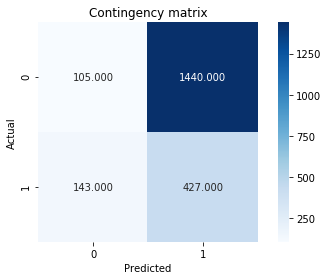

In [77]:
x['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(y, x['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [78]:
print(metrics.adjusted_rand_score(y,x['clusters']))

0.1396696220577096


In [79]:
# compute normalized mutual information
print(metrics.normalized_mutual_info_score(y,x['clusters']))

0.061464457584032


In [80]:
# compute silhouette coefficient
print(metrics.silhouette_score(x,x[['clusters']], metric = "euclidean"))

0.7241722055848013


C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:

clustering = KMeans(n_clusters = 3, init = 'random', n_init = 10).fit(x)

In [82]:
clustering.cluster_centers_

array([[ 7.80111304e+01,  8.61029565e+01,  1.60626087e+01,
         7.12819130e+01,  1.86046087e+05,  7.14782609e-01],
       [ 6.47880952e+01,  7.89821429e+01,  2.83285714e+01,
         6.61059524e+01,  4.11861905e+05, -4.44089210e-16],
       [ 7.65763736e+01,  8.48160714e+01,  9.94203297e+00,
         7.26267857e+01,  9.43183379e+04,  1.00000000e+00]])

In [83]:
clusters = clustering.labels_
print(clusters)

[2 0 0 ... 0 2 0]


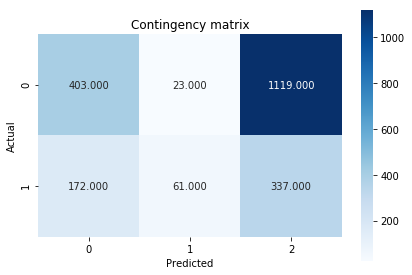

In [84]:
x['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(y, x['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [85]:
print(metrics.adjusted_rand_score(y,x['clusters']))

0.06546637152521675


In [86]:
# compute normalized mutual information
print(metrics.normalized_mutual_info_score(y,x['clusters']))

0.03218296798697002


In [87]:
# compute silhouette coefficient
print(metrics.silhouette_score(x,x[['clusters']], metric = "euclidean"))

0.61906193611219


C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
clustering = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10).fit(x)

In [89]:
clustering.cluster_centers_

array([[ 7.65763736e+01,  8.48160714e+01,  9.94203297e+00,
         7.26267857e+01,  9.43183379e+04,  2.00000000e+00],
       [ 6.47880952e+01,  7.89821429e+01,  2.83285714e+01,
         6.61059524e+01,  4.11861905e+05,  1.00000000e+00],
       [ 7.80111304e+01,  8.61029565e+01,  1.60626087e+01,
         7.12819130e+01,  1.86046087e+05, -2.22044605e-15]])

In [90]:
clusters = clustering.labels_
print(clusters)

[0 2 2 ... 2 0 2]


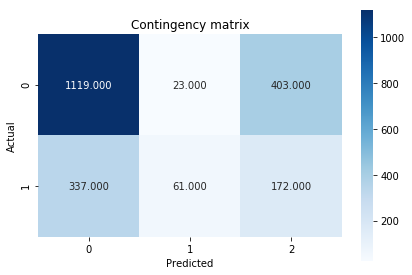

In [91]:
x['clusters'] = clusters
cont_matrix = metrics.cluster.contingency_matrix(y, x['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [92]:
print(metrics.adjusted_rand_score(y,x['clusters']))

0.06546637152521675


In [93]:
# compute normalized mutual information
print(metrics.normalized_mutual_info_score(y,x['clusters']))

0.03218296798697002


In [94]:
# compute silhouette coefficient
print(metrics.silhouette_score(x,x[['clusters']], metric = "euclidean"))

0.61906193611219


C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
## K-means with n_clusters = 2, init = 'random', n_init = 1 with the following variables: 'Percent White, not Hispanic or Latino','Percent White','Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate','Median Value of Owner-Occupied Units' provide better adjusted_rand_score and silhouette coefficient

In [96]:
x = data_train[data_train.columns[2:41]]
x = x[['Percent White, not Hispanic or Latino','Percent White','Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate','Median Value of Owner-Occupied Units']]
y = data_train['Party']

In [97]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# CLUSTERING: Agglomerative clustering with single (min) linkage
clustering = linkage(x, method = "single", metric = "euclidean")

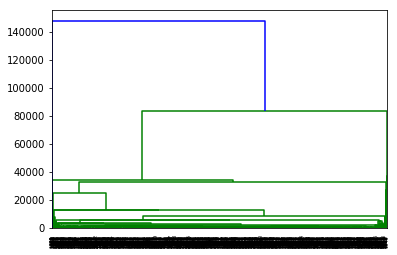

In [98]:
# plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

In [99]:
# form clusters
clusters = fcluster(clustering, 2, criterion = 'maxclust')
print(clusters)

[1 1 1 ... 1 1 1]


In [100]:
x['clusters'] = clusters - 1

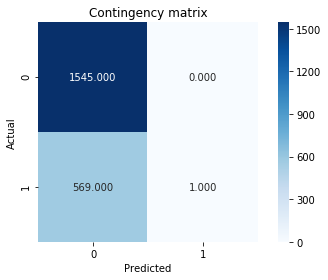

In [101]:
# plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(y, x['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [102]:
print(metrics.adjusted_rand_score(y,x['clusters']))

0.0016166956778420718


In [103]:
# compute normalized mutual information
print(metrics.normalized_mutual_info_score(y,x['clusters']))

0.012699828965930337


In [104]:
# compute silhouette coefficient
print(metrics.silhouette_score(x,x[['clusters']], metric = "euclidean"))

0.9005617988434077


C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
# CLUSTERING: Agglomerative clustering with complete (max) linkage
clustering = linkage(x, method = "complete", metric = "euclidean")

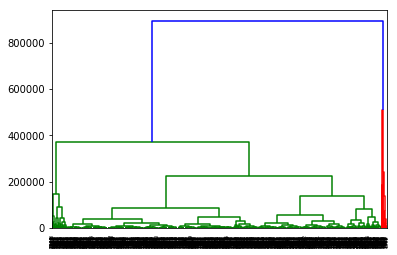

In [106]:
# plot dendrogram
plt.figure()
dendrogram(clustering)
plt.show()

In [107]:
# form clusters
clusters = fcluster(clustering, 3, criterion = 'maxclust')
print(clusters)

[1 1 1 ... 1 1 1]


In [108]:
# plot clusters
x['clusters'] = clusters - 1

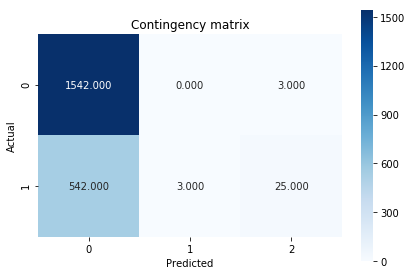

In [109]:
# plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(y, x['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [110]:
print(metrics.adjusted_rand_score(y,x['clusters']))

0.043222499875730444


In [111]:
# compute normalized mutual information
print(metrics.normalized_mutual_info_score(y,x['clusters']))

0.06218838168143503


In [112]:
# compute silhouette coefficient
print(metrics.silhouette_score(x,x[['clusters']], metric = "euclidean"))

0.7996417822024529


C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## From the supervised and unsupervised learning methods, Kernel SVM with RBF Kernel gives the best performance with the predictor variables selected as 'Percent White, not Hispanic or Latino', 'Percent White', 'Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate'

In [125]:
import numpy as np

data_test = pd.read_csv('demographics_test.csv')
data_test_X = data_test[['Percent White, not Hispanic or Latino', 'Percent White', 'Percent Housing Units in Multi-Unit Structures', 'Homeownership Rate']]

data_test_Xdem = data_test[['2010 Population', 'Households', '2014 Population', 'Housing Units', 'Retail Sales', 'Veterans']]

data_test_Xrep = data_test[['Veterans', 'Housing Units', 'Retail Sales', 'Households', '2014 Population']]

scaler = StandardScaler()
scaler.fit(data_test_X)
data_test_X = scaler.transform(data_test_X)

scaler.fit(data_test_Xdem)
data_test_Xdem = scaler.transform(data_test_Xdem)

scaler.fit(data_test_Xrep)
data_test_Xrep = scaler.transform(data_test_Xrep)

y_pred_dem = best_dems.predict(data_test_Xdem)

y_pred_rep = best_repb.predict(data_test_Xrep)

y_pred = bestModel.predict(data_test_X)

data_test['Party'] = np.where(y_pred==1, 'Democratic', 'Republican')
data_test['Democratic'] = y_pred_dem
data_test['Republican'] = y_pred_rep
output = data_test[['County','State','Democratic','Republican','Party']]
output.to_csv('output_uthiraa_saket.csv',index=False,sep=',',encoding='utf-8')
output.head(1000)

,County,State,Democratic,Republican,Party
0,Fremont,ID,-1104.849189,2302.382138,Republican
1,Love,OK,-1104.839056,2302.352885,Republican
2,Fayette,PA,-1105.191219,2303.088902,Republican
3,Dent,MO,-1104.873506,2302.404072,Republican
4,Monroe,MI,-1105.107160,2303.035688,Republican
5,Ellis,OK,-1104.832303,2302.333238,Republican
6,Red Willow,NE,-1104.852323,2302.374379,Republican
7,Trempealeau,WI,-1104.870255,2302.444739,Republican
8,Covington,VA,-1104.848598,2302.353859,Republican
9,Fulton,AR,-1104.859915,2302.388659,Republican


In [ ]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import re
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['County'] = df_sample['County Name/State Abbreviation'].str.split(',').str[0].apply(lambda x: re.sub(r"\s\w*County|\s\w+\s+Plt\.$|\s\w*Parish|\b\w*City", "", x))
df_sample['State'] = df_sample['County Name/State Abbreviation'].str.split(',').str[1].str.strip()
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

map_data = pd.merge(df_sample,data_train[['County','State','Party']],left_on=['County','State'], right_on =['County','State'],how='left')
map_data['Party'] = map_data['Party'].fillna(2).astype(np.int64)


colorscale = ["#ff0000","#0000ff","#00ff00","#000000"]
endpts = list(np.linspace(0,2, len(colorscale)-1))
fips = map_data['FIPS'].tolist()
values = map_data['Party'].tolist()


fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Election',
    legend_title='party'
)
py.iplot(fig, filename='choropleth_full_usa')

In [ ]:
# TASK 9
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd


output['Party_code'] = np.where(y_pred=='Democratic', 1, 0)

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['County'] = df_sample['County Name/State Abbreviation'].str.split(',').str[0].apply(lambda x: re.sub(r"\s\w*County|\s\w+\s+Plt\.$|\s\w*Parish|\b\w*City", "", x))
df_sample['State'] = df_sample['County Name/State Abbreviation'].str.split(',').str[1].str.strip()
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

map_data = pd.merge(df_sample,output[['County','State','Party_code']],left_on=['County','State'], right_on =['County','State'],how='left')
map_data['Party_code'] = map_data['Party_code'].fillna(2).astype(np.int64)


colorscale = ["#ff0000","#0000ff","#00ff00","#000000"]
endpts = list(np.linspace(0,2, len(colorscale)-1))
fips = map_data['FIPS'].tolist()
values = map_data['Party_code'].tolist()


fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Election',
    legend_title='party'
)
py.iplot(fig, filename='choropleth_full_usa')